## 图像运算

In [ ]:
#加法 两幅图像的大小，类型必须一致，或者第二个图像可以使一个简单的标量值。
x = np.uint8([250])  #uint8应该是无符号8位二进制整型，其实就是unsigned char类型。
y = np.uint8([10])

print cv2.add(x,y) # 250+10 = 260 => 255  饱和运算
print x+y          # 250+10 = 260 % 256 = 4  ????

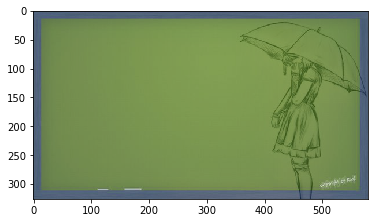

In [5]:
#权重加法
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1=cv2.imread('C:/Users/situ.st.1/Pictures/beautiful/2.jpg')
img2=cv2.imread('C:/Users/situ.st.1/Pictures/beautiful/3.jpg')
img2 = img2[0:326,:,:]  #两幅图像的大小，类型必须一致

dst=cv2.addWeighted(img1,0.7,img2,0.3,0)
plt.imshow(dst,"gray")
plt.show()

In [1]:
# 练习:创建一个幻灯片，来演示如何将一幅图平滑转换到另一幅图,使用函数cv2.addWeighted()
import cv2
import time
step_list = [0.01 * x for x in range(0, 101)]
img1 = cv2.imread("C:/Users/situ.st.1/Pictures/beautiful/5.jpg")
img2 = cv2.imread("C:/Users/situ.st.1/Pictures/beautiful/2.jpg")
cv2.imshow("show", img1)
for i in step_list:
    res = cv2.addWeighted(img1, i, img2, (1-i), 0)
    cv2.imshow("show", res)
    cv2.waitKey(60)
if cv2.waitKey(0) ==27:
    # 按'Esc'退出
    cv2.destroyAllWindows()

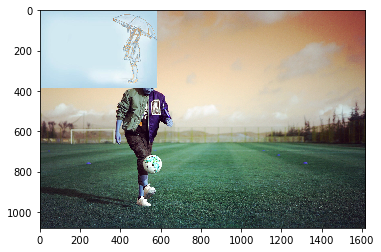

In [7]:
#按位运算
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1=cv2.imread('C:/Users/situ.st.1/Pictures/splitman.jpg')
img2=cv2.imread('C:/Users/situ.st.1/Pictures/beautiful/3.jpg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ] #就是裁剪出同样大小的区域

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) #灰度
ret, mask = cv2.threshold(img2gray, 150, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask) ##反色，即对二值图每个像素取反

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask) #对原图像和掩膜进行位运算

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1,"gray")
plt.show()

### 交运算

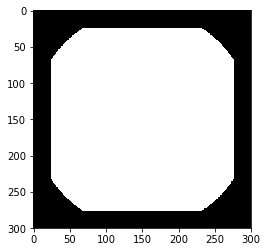

In [8]:
import numpy as np
import cv2

#画矩形
Rectangle = np.zeros((300,300),dtype="uint8")
cv2.rectangle(Rectangle,(25,25),(275,275),255,-1)
#cv2.imshow("Rectangle",Rectangle)
#cv2.waitKey(0)

#画圆形
Circle = np.zeros((300,300),dtype="uint8")
cv2.circle(Circle,(150,150),150,255,-1)
#cv2.imshow("Circle",Circle)
#cv2.waitKey(0)

#图像的交
bitwiseAnd = cv2.bitwise_and(Rectangle,Circle)
plt.imshow(bitwiseAnd,"gray")
plt.show()

### 或运算

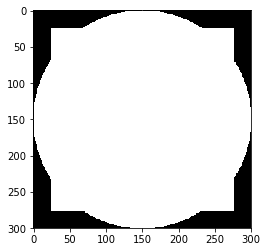

In [9]:
bitwiseOr = cv2.bitwise_or(Rectangle,Circle)
plt.imshow(bitwiseOr,"gray")
plt.show()

### 异或运算

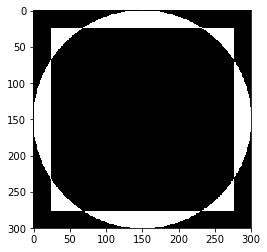

In [10]:
bitwiseXor = cv2.bitwise_xor(Rectangle,Circle)
plt.imshow(bitwiseXor,"gray")
plt.show()

### 非运算

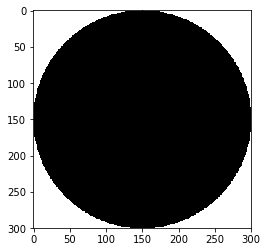

In [11]:
bitwiseNot = cv2.bitwise_not(Circle)
plt.imshow(bitwiseNot,"gray")
plt.show()

## 图像金字塔

In [12]:
import cv2
import numpy as np
def sameSize(img1, img2):  
    rows, cols, dpt = img2.shape  
    dst = img1[:rows,:cols]  
    return dst  

A = cv2.imread('C:/Users/situ.st.1/Pictures/beautiful/49.jpg')
B = cv2.imread('C:/Users/situ.st.1/Pictures/beautiful/50.jpg')
A = sameSize(A,B)
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in xrange(6): 
    G = cv2.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in xrange(6):
    G = cv2.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A 
#拉普拉斯金字塔图像为高斯金字塔层间差值，类似于边缘图
lpA = [gpA[5]] 
for i in xrange(5,0,-1): #5,4,3,2,1
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],sameSize(GE,gpA[i-1]))
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in xrange(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],sameSize(GE,gpB[i-1]))
    lpB.append(L)
# 对apple和orange的Laplace金字塔进行1/2拼接
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols/2], lb[:,cols/2:])) #水平合并数组
    LS.append(ls)
# 对拼接后的Laplace金字塔重建获取融合后的结果 
ls_ = LS[0]
for i in xrange(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(sameSize(ls_,LS[i]),LS[i])
# image with direct connecting each half
real = np.hstack((A[:,:cols/2],B[:,cols/2:]))

cv2.imshow('res',ls_)
cv2.imshow('real',real)
cv2.waitKey(0)
cv2.destroyAllWindows()